<h1 style="text-align: center"> Business Metrics - Sales Analysis</h1>

<p style="text-align: justify">This sales analysis report aims to provide comprehensive insights into sales data across various product categories over a defined period. The goal is to identify key trends, patterns, and opportunities that can inform strategic decision-making and drive business growth. Specifically, I seek to identify product categories whose sales trend over time have declined and identify key reasons for such decline. Through achieving these objectives, I aim to equip management with actionable insights to optimize sales performance, enhance customer satisfaction, and maintain a competitive edge in the market. </p>

In [1]:
#Libraries Used
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading data
data = pd.read_csv("retail_price.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

### Data Cleaning and Missing values

In [3]:
data['month_year'] = pd.to_datetime(data['month_year'])
data['month'] = pd.to_datetime(data['month'], format='%m').dt.month
data['year'] = pd.to_datetime(data['year'], format='%Y').dt.year
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   product_id                  676 non-null    object        
 1   product_category_name       676 non-null    object        
 2   month_year                  676 non-null    datetime64[ns]
 3   qty                         676 non-null    int64         
 4   total_price                 676 non-null    float64       
 5   freight_price               676 non-null    float64       
 6   unit_price                  676 non-null    float64       
 7   product_name_lenght         676 non-null    int64         
 8   product_description_lenght  676 non-null    int64         
 9   product_photos_qty          676 non-null    int64         
 10  product_weight_g            676 non-null    int64         
 11  product_score               676 non-null    float64       

In [4]:
#Percentage of missing values

for col in data.columns:
    percent_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

product_id - 0%
product_category_name - 0%
month_year - 0%
qty - 0%
total_price - 0%
freight_price - 0%
unit_price - 0%
product_name_lenght - 0%
product_description_lenght - 0%
product_photos_qty - 0%
product_weight_g - 0%
product_score - 0%
customers - 0%
weekday - 0%
weekend - 0%
holiday - 0%
month - 0%
year - 0%
s - 0%
volume - 0%
comp_1 - 0%
ps1 - 0%
fp1 - 0%
comp_2 - 0%
ps2 - 0%
fp2 - 0%
comp_3 - 0%
ps3 - 0%
fp3 - 0%
lag_price - 0%


<h2 style="text-align: center;"> Exploratory Data Analysis </h2>

#### Revenue generated for each Product Category in 2017 compared to 2018

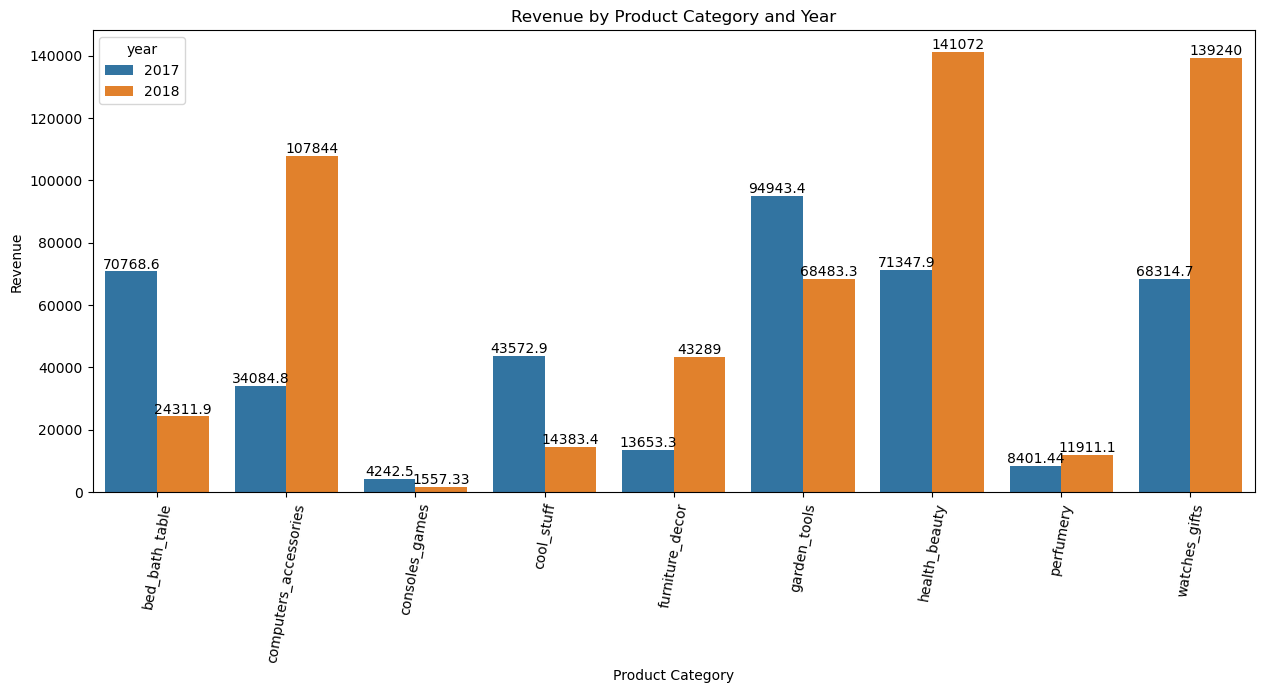

In [5]:
data['revenue'] = data['qty'] * data['unit_price']
graph1 = data.groupby(['product_category_name', 'year'])['revenue'].sum().reset_index()

plt.figure(figsize=(15, 6))
graph1 = sns.barplot(data=graph1, x='product_category_name', y='revenue', hue="year")
for i in graph1.containers:
    graph1.bar_label(i,)
plt.title('Revenue by Product Category and Year')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.xticks(rotation=80)
plt.show()

<p>There is a decline in revenue for bath products, game consoles, cool stuffs and garden tools.</p>

### Analysing Percentage Change in Revenue from 2017 to 2018 for each Product Group

In [6]:
table1 = data.groupby(['product_category_name', 'year'])['revenue'].sum().reset_index()
table1 = table1.pivot(index='product_category_name', columns='year', values='revenue').reset_index()
table1['percentage_change'] = round((table1[2018] - table1[2017]) / table1[2017] * 100, 2)

table1

year,product_category_name,2017,2018,percentage_change
0,bed_bath_table,70768.638970,24311.858333,-65.65
1,computers_accessories,34084.844644,107843.543148,216.40
2,consoles_games,4242.500000,1557.333333,-63.29
3,cool_stuff,43572.850001,14383.450000,-66.99
4,furniture_decor,13653.280000,43288.987049,217.06
5,garden_tools,94943.433570,68483.309525,-27.87
6,health_beauty,71347.887407,141071.521759,97.72
7,perfumery,8401.440000,11911.071111,41.77
8,watches_gifts,68314.657193,139240.420111,103.82


### Visualizing the Percentage Change in Revenue

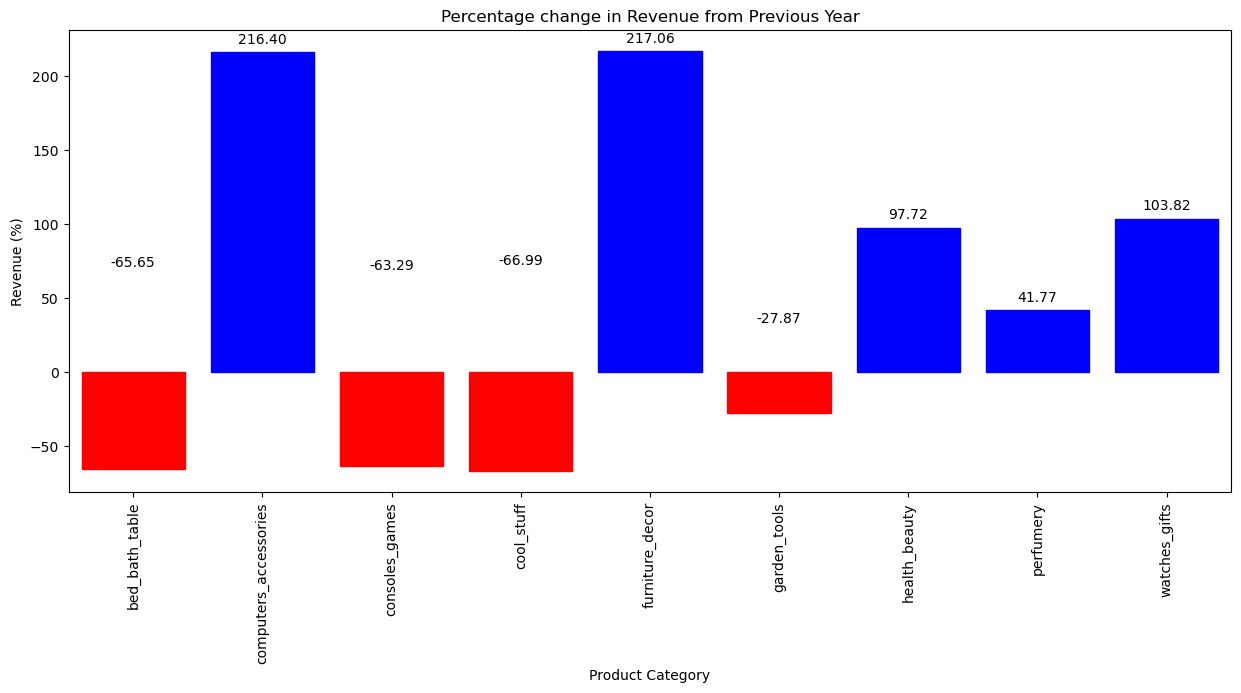

In [12]:
plt.figure(figsize=(15, 6))
graph2 = sns.barplot(data=table1, x='product_category_name', y='percentage_change', palette='vlag')
   
for i in graph2.patches:
    graph2.annotate(format(i.get_height(), '.2f'), 
                      (i.get_x() + i.get_width() / 2., abs(i.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
                   
    if i.get_height() < 0:
        i.set_color('red')
    else:
        i.set_color('blue')    
    
plt.title('Percentage change in Revenue from Previous Year')
plt.xlabel('Product Category')
plt.ylabel('Revenue (%)')
plt.xticks(rotation=90)
plt.show()

<p> From the graph, bath products, game consoles, cool stuffs and garden tools had a lower sales revenue in 2018 compared to the previous year 2017. This can be as a result of factors such as customer churn due to price differences and or product quality as compared to their competitors. The next codes analysis the reason for this lower revenue for the four product categories.</p>

### Total number of quantity sold in each product category grouped by year

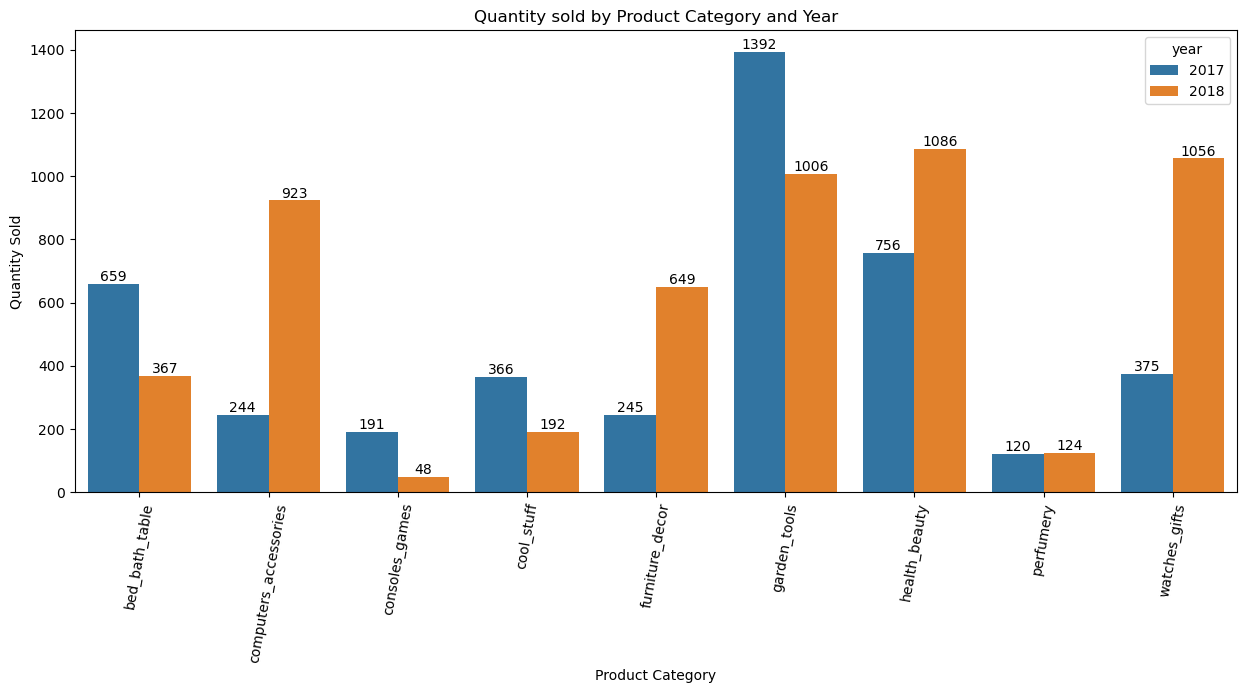

In [8]:
graph3 = data.groupby(['product_category_name', 'year'])['qty'].sum().reset_index()

plt.figure(figsize=(15, 6))
graph3 = sns.barplot(data=graph3, x='product_category_name', y='qty', hue="year")
for i in graph3.containers:
    graph3.bar_label(i,)
    
plt.title('Quantity sold by Product Category and Year')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=80)
plt.show()

<p> From the graph, bed_bath, consoles game, cool stuff and garden tools had lower sales in the current year 2018 compared to the previous year 2017. This is also the reason for the lower revenue in these four products given that prices remained the same in 2018.</p>

### Analysing customer churn as a reason for the lower sales.

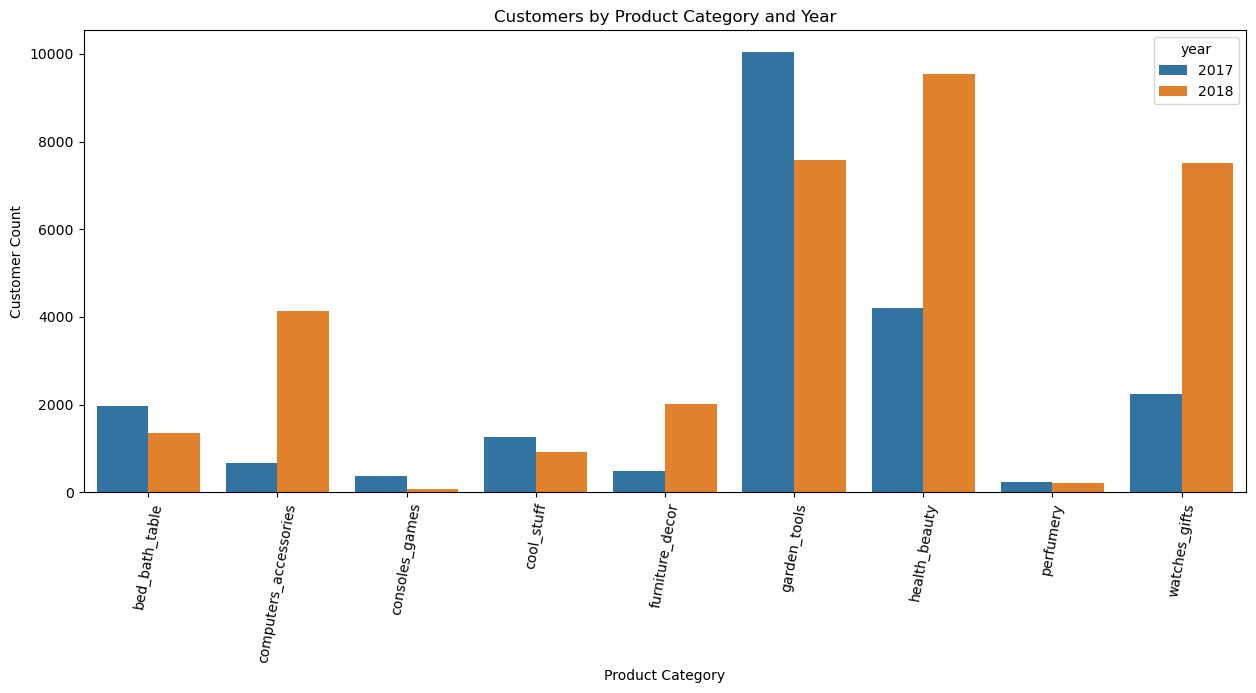

In [9]:
graph4 = data.groupby(['product_category_name', 'year'])['customers'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(data=graph4, x='product_category_name', y='customers', hue="year")
plt.title('Customers by Product Category and Year')
plt.xlabel('Product Category')
plt.ylabel('Customer Count')
plt.xticks(rotation=80)
plt.show()

<p> From the graph, it is obvious that products with low sales in 2018 also have lower customers purchasing. This can be as a result of customers moving to competitors for reasons like price differences, product quality etc. The next code analysis competitor price of the same product using competitor 1 (comp_1), competitor 2 (comp_2) and competitor 3 (comp_3) for the products that had low sales.</p>

### Average unit price across product category compared to the unit price of three competitors

In [10]:
table2 = data.groupby(['product_category_name', 'year'])[['unit_price', 'comp_1', 'comp_2', 'comp_3']].mean().reset_index()
table2 = table2.rename(columns={'unit_price':'avg_unit_price', 
                                'comp_1':'avg_comp1_price', 
                                'comp_2':'avg_comp2_price', 
                                'comp_3':'avg_comp3_price'})

table2

,product_category_name,year,avg_unit_price,avg_comp1_price,avg_comp2_price,avg_comp3_price
0,bed_bath_table,2017,92.285767,89.711765,135.771335,48.827909
1,bed_bath_table,2018,65.413321,82.932639,65.413321,39.917419
2,computers_accessories,2017,133.299327,149.821451,133.299327,129.259994
3,computers_accessories,2018,108.853858,131.481117,149.969930,82.091835
4,consoles_games,2017,21.634127,21.707143,21.561111,21.634127
5,consoles_games,2018,33.513333,33.574762,33.451905,33.513333
6,cool_stuff,2017,111.519490,99.581837,121.503551,107.491490
7,cool_stuff,2018,102.031637,91.553485,119.764091,53.157273
8,furniture_decor,2017,56.084439,70.694118,43.806891,70.182353
9,furniture_decor,2018,62.386101,78.729505,35.940092,95.759370


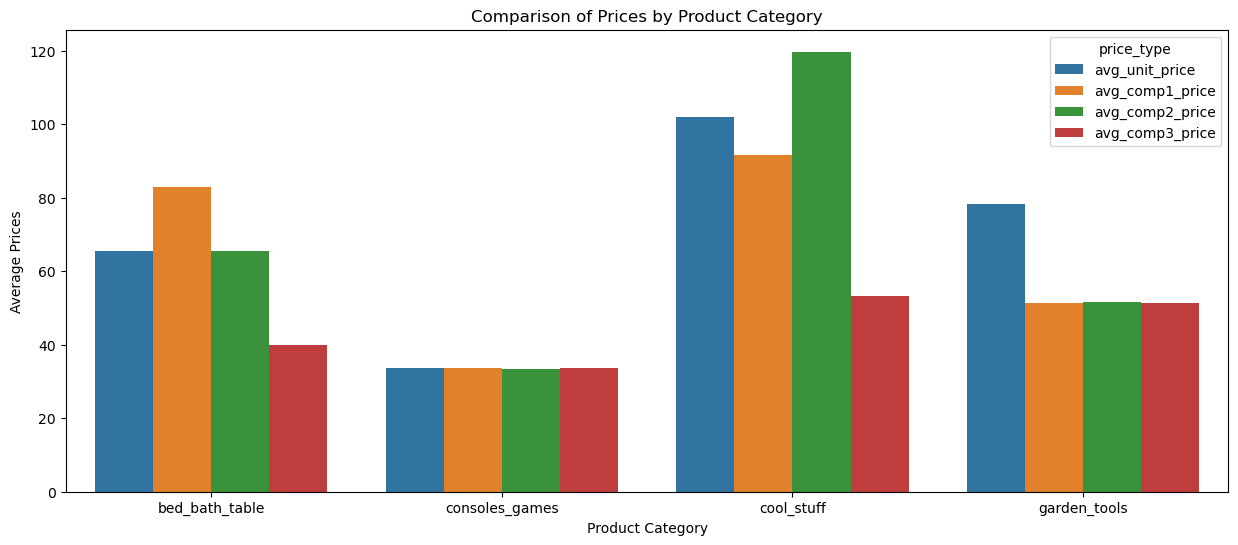

In [11]:
# Selecting products with low sales in 2018 (bed_bath, consoles game, cool stuff and garden tools) and visualizing.

avg_price_table = table2.iloc[[1, 5, 7, 11]]   #Only 2018 average prices
avgprice_melt = avg_price_table.melt(id_vars=['product_category_name', 'year'], var_name='price_type', value_name='average_price')

plt.figure(figsize=(15, 6))
sns.barplot(data=avgprice_melt, x='product_category_name', y='average_price', hue='price_type')
plt.title('Comparison of Prices by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Prices')
plt.show()

Comparing the average prices, the 2018 prices of the products were higher than their competitors for bath products, cool products, garden tools. Only console games had same or very close prices. Since there are other factors that affect sales, we cannot conclude that price differentition was the only problem although the analysis shows that price differences could be the reason for the lower sales. 


<h3> Conclusion: </h3>



<p style = "text-align: justify"> In summary, the sales analysis reveals a decrease in revenue for four product categories, bath products, game consoles, cool stuff, and garden tools in 2018 compared to the previous year. Analyzing the competitor prices highlighted higher average prices for bath products, cool products, and garden tools in 2018 compared to competitors, indicating a potential influence on customer decision-making. While price differentiation emerges as a possible factor affecting sales, it's essential to acknowledge other variables that contribute to customer behavior. Thus, while price differences may have influenced customer decisions, additional factors may also have played a role in the observed sales trends.</p>